In [1]:
import nltk
from nltk.corpus import inaugural
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [2]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')


**Find the number of characters, words, and sentences for the mentioned documents.**

In [4]:
import nltk
nltk.download('punkt')
# Find number of characters, words, and sentences for each speech
roosevelt_chars = len(roosevelt_speech)
roosevelt_words = len(nltk.word_tokenize(roosevelt_speech))
roosevelt_sents = len(nltk.sent_tokenize(roosevelt_speech))

kennedy_chars = len(kennedy_speech)
kennedy_words = len(nltk.word_tokenize(kennedy_speech))
kennedy_sents = len(nltk.sent_tokenize(kennedy_speech))

nixon_chars = len(nixon_speech)
nixon_words = len(nltk.word_tokenize(nixon_speech))
nixon_sents = len(nltk.sent_tokenize(nixon_speech))

# Print results
print("Roosevelt Speech: ")
print("Number of characters:", roosevelt_chars)
print("Number of words:", roosevelt_words)
print("Number of sentences:", roosevelt_sents)
print("\n")

print("Kennedy Speech: ")
print("Number of characters:", kennedy_chars)
print("Number of words:", kennedy_words)
print("Number of sentences:", kennedy_sents)
print("\n")

print("Nixon Speech: ")
print("Number of characters:", nixon_chars)
print("Number of words:", nixon_words)
print("Number of sentences:", nixon_sents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Roosevelt Speech: 
Number of characters: 7571
Number of words: 1526
Number of sentences: 68


Kennedy Speech: 
Number of characters: 7618
Number of words: 1543
Number of sentences: 52


Nixon Speech: 
Number of characters: 9991
Number of words: 2006
Number of sentences: 68


**Remove all the stopwords from all three speeches**

In [13]:
# Get the words for Roosevelt's speech
roosevelt_words = inaugural.words('1941-Roosevelt.txt')

# Get the words for Kennedy's speech
kennedy_words = inaugural.words('1961-Kennedy.txt')

# Get the words for Nixon's speech
nixon_words = inaugural.words('1973-Nixon.txt')

In [15]:
import nltk
import re
import string
from nltk.stem.snowball import SnowballStemmer

# Define the tokenizer function
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stemmer = SnowballStemmer("english")

def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens

# Apply the tokenizer function to each speech and remove stopwords
roosevelt_clean = [word for word in myTokenizer(roosevelt_speech) if word not in stopwords]
kennedy_clean = [word for word in myTokenizer(kennedy_speech) if word not in stopwords]
nixon_clean = [word for word in myTokenizer(nixon_speech) if word not in stopwords]

# Print the cleaned speeches
print(roosevelt_clean)
print(kennedy_clean)
print(nixon_clean)


['nation', 'day', 'inaugur', 'sinc', 'peopl', 'renew', 'sens', 'dedic', 'unit', 'state', 'washington', "'s", 'day', 'task', 'peopl', 'creat', 'weld', 'togeth', 'nation', 'lincoln', "'s", 'day', 'task', 'peopl', 'preserv', 'nation', 'disrupt', 'within', 'day', 'task', 'peopl', 'save', 'nation', 'institut', 'disrupt', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happen', 'paus', 'moment', 'take', 'stock', 'recal', 'place', 'histori', 'rediscov', 'may', 'risk', 'real', 'peril', 'inact', 'live', 'nation', 'determin', 'count', 'year', 'lifetim', 'human', 'spirit', 'life', 'man', 'three-scor', 'year', 'ten', 'littl', 'littl', 'less', 'life', 'nation', 'full', 'measur', 'live', 'men', 'doubt', 'men', 'believ', 'democraci', 'form', 'govern', 'frame', 'life', 'limit', 'measur', 'kind', 'mystic', 'artifici', 'fate', 'unexplain', 'reason', 'tyranni', 'slaveri', 'becom', 'surg', 'wave', 'futur', 'freedom', 'eb', 'tide', 'american', 'know', 'true', 'eight', 'year', 'ago', 'life', 'republ', '

In [16]:
from nltk.probability import FreqDist

# Calculate the frequency distribution of words in each speech
roosevelt_freqdist = FreqDist(roosevelt_clean)
kennedy_freqdist = FreqDist(kennedy_clean)
nixon_freqdist = FreqDist(nixon_clean)

# Get the three most common words in each speech
roosevelt_top_words = roosevelt_freqdist.most_common(3)
kennedy_top_words = kennedy_freqdist.most_common(3)
nixon_top_words = nixon_freqdist.most_common(3)

# Print the results
print("Roosevelt's top words:", roosevelt_top_words)
print("Kennedy's top words:", kennedy_top_words)
print("Nixon's top words:", nixon_top_words)


Roosevelt's top words: [('nation', 17), ('know', 10), ('peopl', 9)]
Kennedy's top words: [('let', 16), ('us', 12), ('power', 9)]
Nixon's top words: [('us', 26), ('let', 22), ('america', 21)]


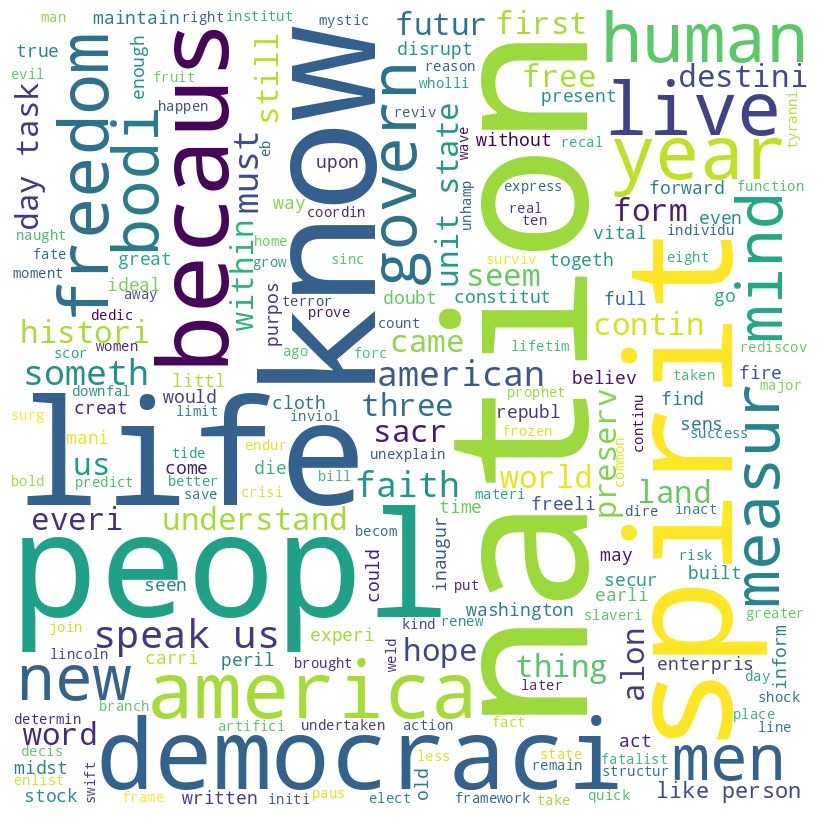

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a function to plot word cloud
def plot_wordcloud(text):
    # Generate word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    # Show the plot
    plt.show()

# Plot word clouds for each speech
plot_wordcloud(" ".join(roosevelt_clean))



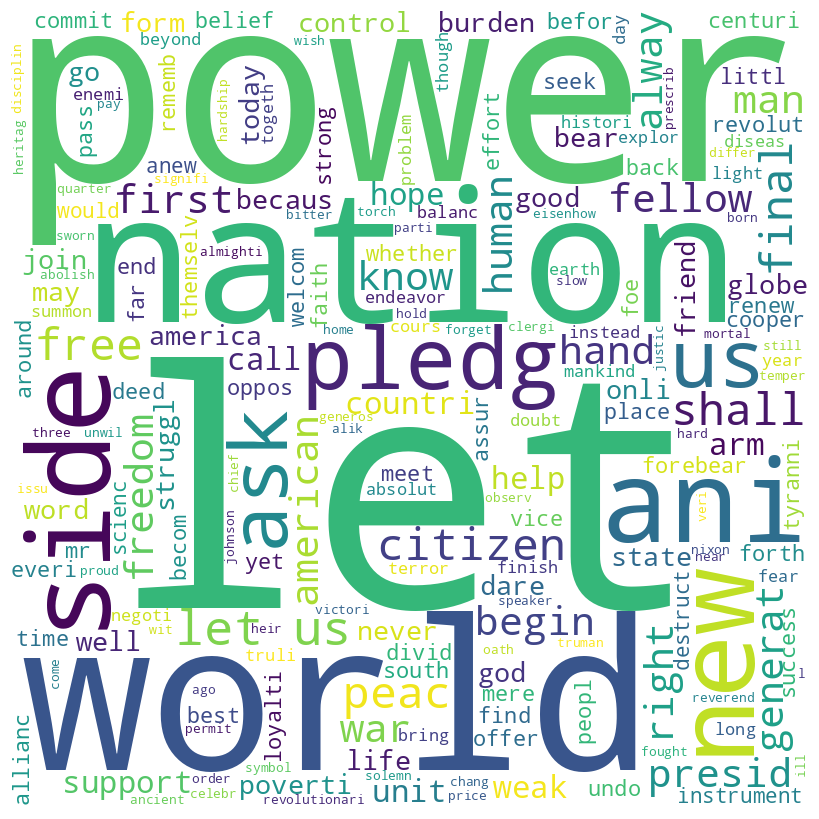

In [19]:
plot_wordcloud(" ".join(kennedy_clean))


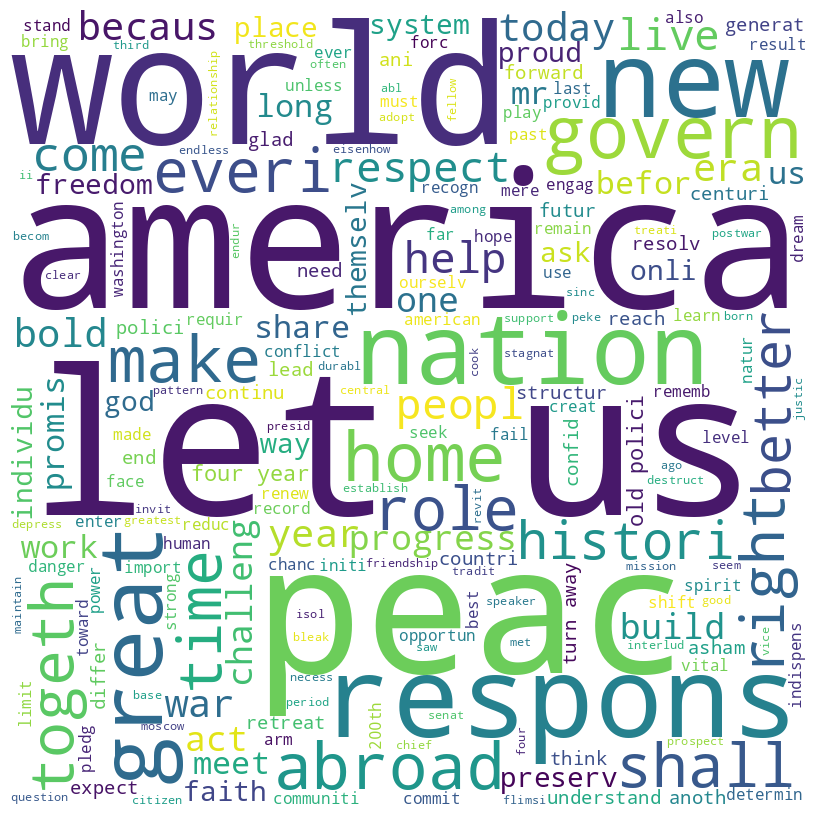

In [20]:
plot_wordcloud(" ".join(nixon_clean))